In [1]:
import numpy as np
import pandas as pd
X = np.array([[0, 1, 0, 1],
[1, 0, 1, 1],
[0, 0, 0, 1],
[1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])

In [2]:
counts = {}
for label in np.unique(y):
# iterate over each class
# count (sum) entries of 1 per feature
    counts[label] = X[y == label].sum(axis=0)
print("Feature counts:\n{}".format(counts))

Feature counts:
{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


In [3]:
X[y==0],X[y==1]

(array([[0, 1, 0, 1],
        [0, 0, 0, 1]]),
 array([[1, 0, 1, 1],
        [1, 0, 1, 0]]))

# Decision Tree

In [4]:
import mglearn

C:\Users\rissu\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
C:\Users\rissu\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


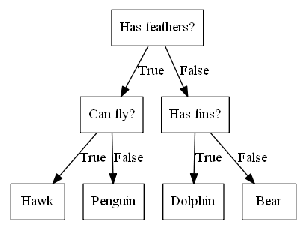

In [5]:
mglearn.plots.plot_animal_tree()

To build a tree, the algorithm searches over all possible tests and finds the one that is
most informative about the target variable. Figure 2-24 shows the first test that is
picked. Splitting the dataset vertically at x[1]=0.0596 yields the most information; it
best separates the points in class 1 from the points in class 2. The top node, also called
the root, represents the whole dataset, consisting of 75 points belonging to class 0 and
75 points belonging to class 1. The split is done by testing whether x[1] <= 0.0596,
indicated by a black line. If the test is true, a point is assigned to the left node, which
contains 2 points belonging to class 0 and 32 points belonging to class 1. Otherwise
the point is assigned to the right node, which contains 48 points belonging to class 0
and 18 points belonging to class 1. These two nodes correspond to the top and bottom
regions shown in Figure 2-24. Even though the first split did a good job of separating
the two classes, the bottom region still contains points belonging to class 0, and
the top region still contains points belonging to class 1. We can build a more accurate
model by repeating the process of looking for the best test in both regions.
Figure 2-25 shows that the most informative next split for the left and the right region
is based on x[0].

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [7]:
import pandas as pd
df=pd.DataFrame(cancer.data,columns=cancer.feature_names)
df["target"]=cancer.target
df.target[df.target==0]='malignant'
df.target[df.target==1]='benign'

C:\Users\rissu\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [8]:
df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,malignant


In [9]:
len(cancer.feature_names),cancer.feature_names.size

(30, 30)

In [10]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,
                            stratify=cancer.target,random_state=42)
tree=DecisionTreeClassifier(random_state=0)
tree.fit(X_train,y_train)
tree.score(X_train,y_train),tree.score(X_test,y_test)

(1.0, 0.9370629370629371)

In [12]:
from sklearn.neighbors import KNeighborsClassifier
neighbors=KNeighborsClassifier(n_neighbors=1)
neighbors.fit(X_train,y_train)
neighbors.score(X_train,y_train),neighbors.score(X_test,y_test)

(1.0, 0.9370629370629371)

In [13]:
from sklearn.svm import LinearSVC
tree=LinearSVC(C=100)
tree.fit(X_train,y_train)
tree.score(X_train,y_train),tree.score(X_test,y_test)

C:\Users\rissu\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


(0.8544600938967136, 0.8251748251748252)

In [14]:
tree=DecisionTreeClassifier(max_depth=4,random_state=0)
tree.fit(X_train,y_train)
tree.score(X_train,y_train),tree.score(X_test,y_test)

(0.9882629107981221, 0.951048951048951)

In [15]:
tree=DecisionTreeClassifier(max_depth=4,random_state=0)
tree.fit(X_train,y_train)
tree.score(X_train,y_train),tree.score(X_test,y_test)

(0.9882629107981221, 0.951048951048951)

In [16]:
a=[]
for i in range(1,10):
    tree=DecisionTreeClassifier(max_depth=i,random_state=0)
    tree.fit(X_train,y_train)
    b=[tree.score(X_train,y_train),tree.score(X_test,y_test)]
    a.append(b)
a

[[0.9225352112676056, 0.9230769230769231],
 [0.9577464788732394, 0.9090909090909091],
 [0.9765258215962441, 0.9440559440559441],
 [0.9882629107981221, 0.951048951048951],
 [0.9953051643192489, 0.951048951048951],
 [0.9976525821596244, 0.9370629370629371],
 [1.0, 0.9370629370629371],
 [1.0, 0.9370629370629371],
 [1.0, 0.9370629370629371]]

In [17]:
a=pd.DataFrame(a,columns=["Training_set","Testing_set"])
a.index.name="Depth"
a

,Training_set,Testing_set
Depth,,
0,0.922535,0.923077
1,0.957746,0.909091
2,0.976526,0.944056
3,0.988263,0.951049
4,0.995305,0.951049
5,0.997653,0.937063
6,1.000000,0.937063
7,1.000000,0.937063
8,1.000000,0.937063


In [18]:
tree=DecisionTreeClassifier(max_depth=4,random_state=0)
tree.fit(X_train,y_train)
tree.score(X_train,y_train),tree.score(X_test,y_test)

(0.9882629107981221, 0.951048951048951)

In [19]:
from sklearn.tree import export_graphviz
export_graphviz(tree,out_file='tree.dot',class_names=['malignant','benign'],
               feature_names=cancer.feature_names,impurity=False,filled=True)


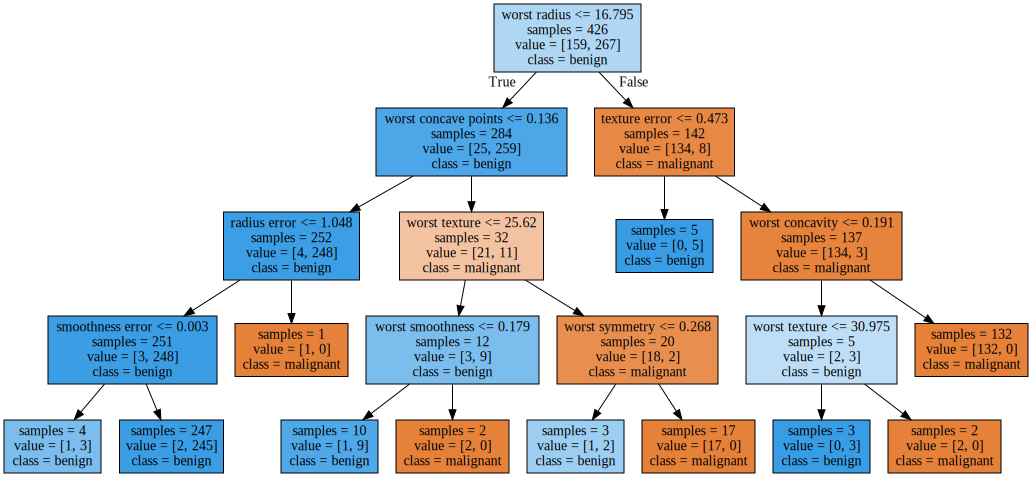

In [20]:
import graphviz
with open("tree.dot") as f:
    dot_graph=f.read()
graphviz.Source(dot_graph)

In [21]:
cancer.data.shape[0]

569

In [22]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [23]:
tree.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01019737, 0.04839825, 0.        , 0.        , 0.0024156 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.72682851, 0.0458159 , 0.        , 0.        , 0.0141577 ,
       0.        , 0.018188  , 0.1221132 , 0.01188548, 0.        ])

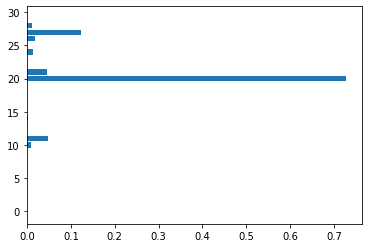

In [26]:
import matplotlib.pyplot as pl
def plot_feature_importance(model):
    n_features=cancer.data.shape[1]
    pl.barh(range(n_features),model.feature_importances_,align='center')
    pl.yticks=(np.arange(30),cancer.feature_names)
plot_feature_importance(tree)

In [25]:
# def plot_feature_importances_cancer(model):
#     n_features = cancer.data.shape[1]
#     pl.barh(range(n_features), model.feature_importances_, align='center')
#     pl.yticks(np.arange(n_features), cancer.feature_names)
#     pl.xlabel("Feature importance")
#     pl.ylabel("Feature")
# plot_feature_importances_cancer(tree)

Feature importances: [0. 1.]


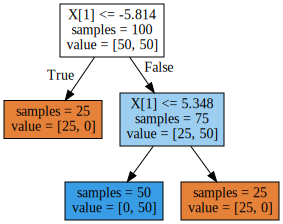

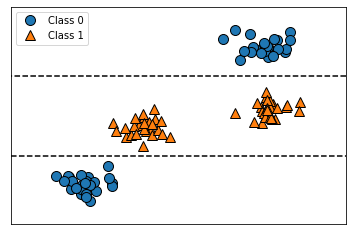

In [28]:
mglearn.plots.plot_tree_not_monotone()


Text(0, 0.5, 'Price in $/Mbyte')

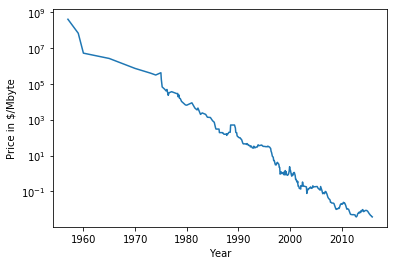

In [40]:
ram_price=pd.read_csv('ram_price.csv')
ram_price.head(5)
pl.semilogy(ram_price.date,ram_price.price)
pl.xlabel('Year')
pl.ylabel("Price in $/Mbyte")

Text(0, 0.5, 'Price in $/Mbyte')

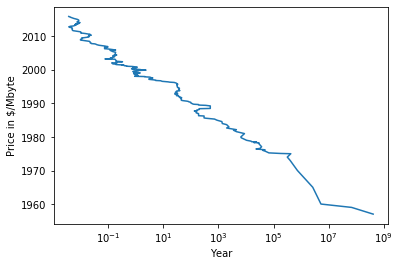

In [47]:
pl.semilogx(ram_price.price,ram_price.date)
pl.xlabel('Year')
pl.ylabel("Price in $/Mbyte")

In [80]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
ram_price=pd.read_csv('ram_price.csv')
data_train=ram_price[ram_price.date<2000]
data_test=ram_price[ram_price.date>=2000]
X_train=data_train.date[:,np.newaxis]
y_train=np.log(data_train.price)
tree=DecisionTreeRegressor().fit(X_train,y_train)
linear_reg=LinearRegression().fit(X_train,y_train)

X_all=ram_price.date[:,np.newaxis]
ram_price.date.shape,X_all.shape
pred_tree=tree.predict(X_all)
pred_lr=linear_reg.predict(X_all)

price_tree=np.exp(pred_tree)
price_lr=np.exp(pred_lr)

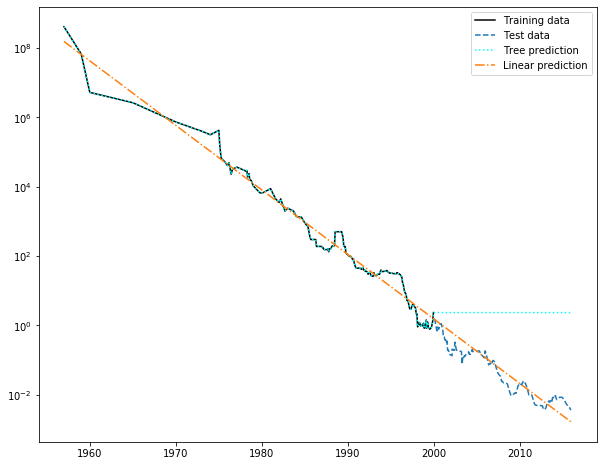

In [98]:
pl.figure(figsize=(10,8))
pl.semilogy(data_train.date,data_train.price,'k-',  label="Training data")
pl.semilogy(data_test.date, data_test.price,linestyle='--', label="Test data")
pl.semilogy(ram_prices.date, price_tree,linestyle=':',color='cyan', label="Tree prediction")
pl.semilogy(ram_prices.date, price_lr,linestyle='-.', label="Linear prediction")
pl.legend()